## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [2]:
df = pd.read_csv("data/craigslist_vehicles.csv")
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


Check the datase info and list the column names

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [4]:
#list columns
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

#### Chenge the posting_date and removal_date to date type

In [5]:
# Convert 'posting date' and 'removal date' columns to datetime format
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['removal_date'] = pd.to_datetime(df['removal_date'])

In [6]:
#check for missing values in the data
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

In [7]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100)

# Calculate the overall missing percentage in the entire dataset
overall_missing_percentage = (df.isnull().sum().sum() / (df.size) * 100)

# Display missing percentages for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

# Display the overall missing percentage in the entire dataset
print("\nOverall missing percentage in the entire dataset:", overall_missing_percentage, "%")

Percentage of missing values in each column:
Unnamed: 0        0.000000
id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
removal_date      0.015930
dtype: float64

Overall missing percentage in the entire dataset: 13.849693456843006 %


Since there are over 5% of missing values in the dataset, we will impute these values using the median for numerical data and mode for categorical data.

In [8]:
# Drop county column since all values are missing
column_to_drop = 'county'
df = df.drop(column_to_drop, axis=1)

In [9]:
#Imoute the missing values
def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # Categorical columns (replace missing values with mode)
            mode = df[column].mode()[0]  # Compute the mode
            df[column].fillna(mode, inplace=True)
        else:
            # Numerical columns (replace missing values with median)
            median = df[column].median()  # Compute the median
            df[column].fillna(median, inplace=True)
    return df

# Impute missing values
df = impute_missing_values(df)

Check if the dataset is correctly imputed

In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100)

# Calculate the overall missing percentage in the entire dataset
overall_missing_percentage = (df.isnull().sum().sum() / (df.size) * 100)

# Display missing percentages for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

# Display the overall missing percentage in the entire dataset
# Sort the DataFrame by date in ascending order
df.sort_values(by='posting_date', inplace=True)

print("\nOverall missing percentage in the entire dataset:", overall_missing_percentage, "%")

Percentage of missing values in each column:
Unnamed: 0      0.0
id              0.0
url             0.0
region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
VIN             0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
image_url       0.0
description     0.0
state           0.0
lat             0.0
long            0.0
posting_date    0.0
removal_date    0.0
dtype: float64

Overall missing percentage in the entire dataset: 0.0 %


In [11]:
# Sort the DataFrame by date in ascending order
df.sort_values(by='posting_date', inplace=True)

# Set the 'posting_date' column as the DataFrame's index
df.set_index('posting_date', inplace=True)

In [12]:
df.head(2)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,removal_date
posting_date,,,,,,,,,,,,,,,,,,,,,
2021-04-04 00:00:00+00:00,412097,7301802999,https://wenatchee.craigslist.org/ctd/d/spokane...,wenatchee,https://wenatchee.craigslist.org,486,2016.0,ram,2500 tradesman 4x4 local,excellent,...,4wd,full-size,truck,white,https://images.craigslist.org/00e0e_ipihu742DA...,$486/mo - 2016 Ram 2500 Tradesman 4X4 LOCAL TR...,wa,47.717677,-117.411665,2021-04-27 00:00:00+00:00
2021-04-04 00:00:00+00:00,406250,7301756252,https://moseslake.craigslist.org/ctd/d/moses-l...,moses lake,https://moseslake.craigslist.org,39000,2013.0,ford,f-350sd xltcrew cab,excellent,...,4wd,full-size,truck,white,https://images.craigslist.org/00q0q_dz6WYDWyDA...,$457/mo - 2013 Ford F350SD F 350 SD F-350-SD F...,wa,47.104226,-119.250561,2021-04-13 00:00:00+00:00


### Visualizations

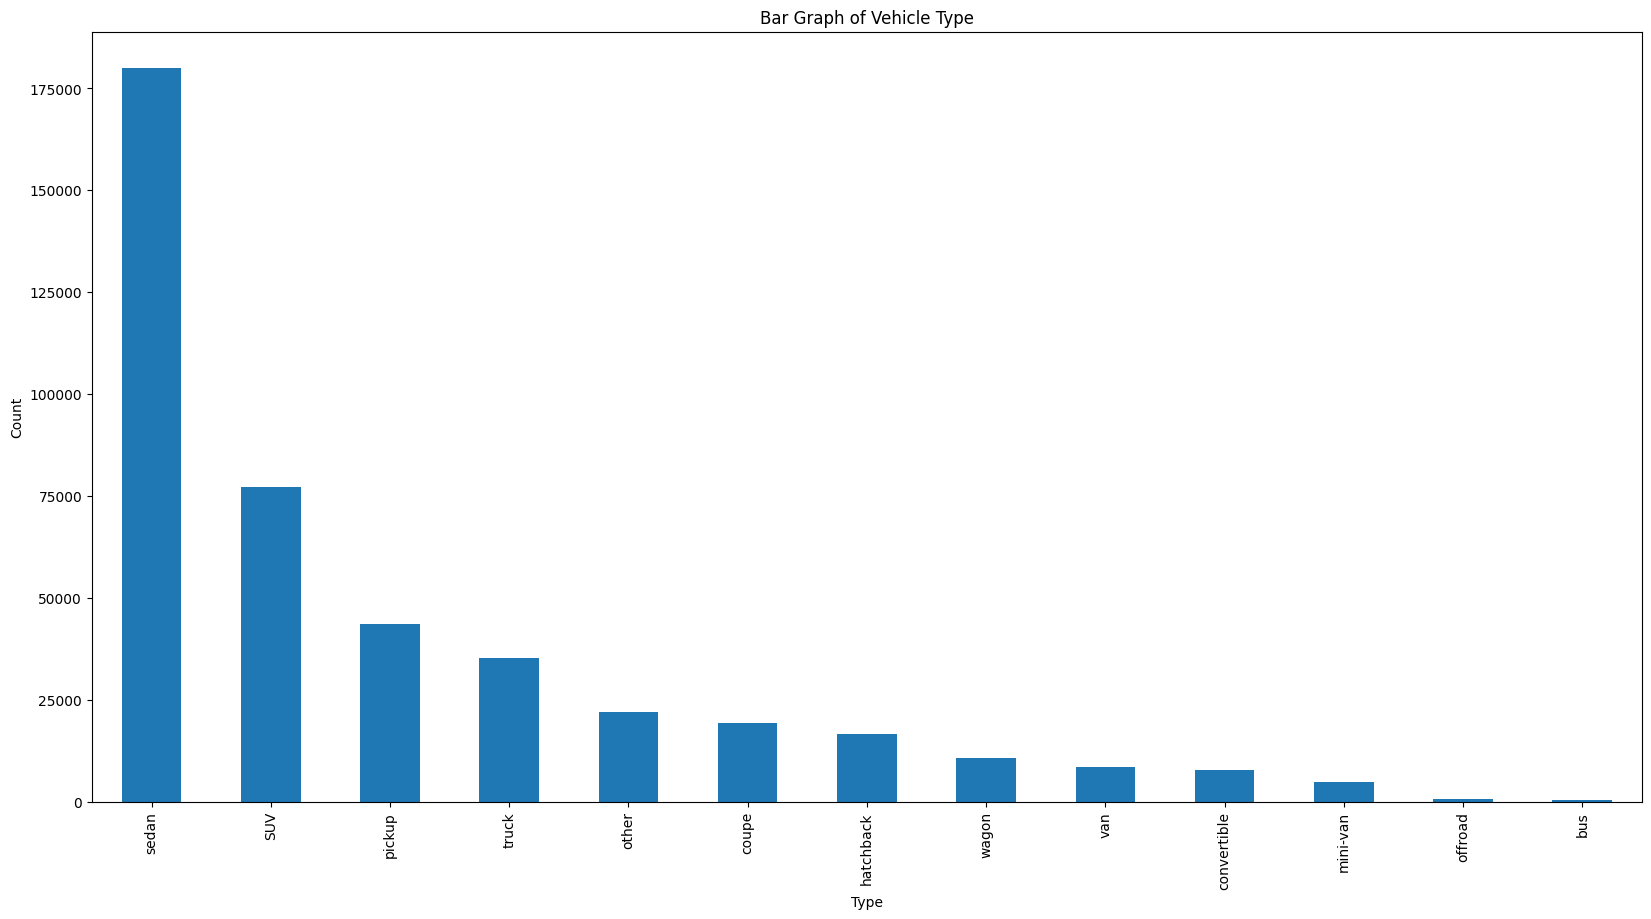

In [13]:
# Plot bar graph for the 'region' column
plt.figure(figsize=(20, 10))
df['type'].value_counts().plot(kind='bar')
plt.title('Bar Graph of Vehicle Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

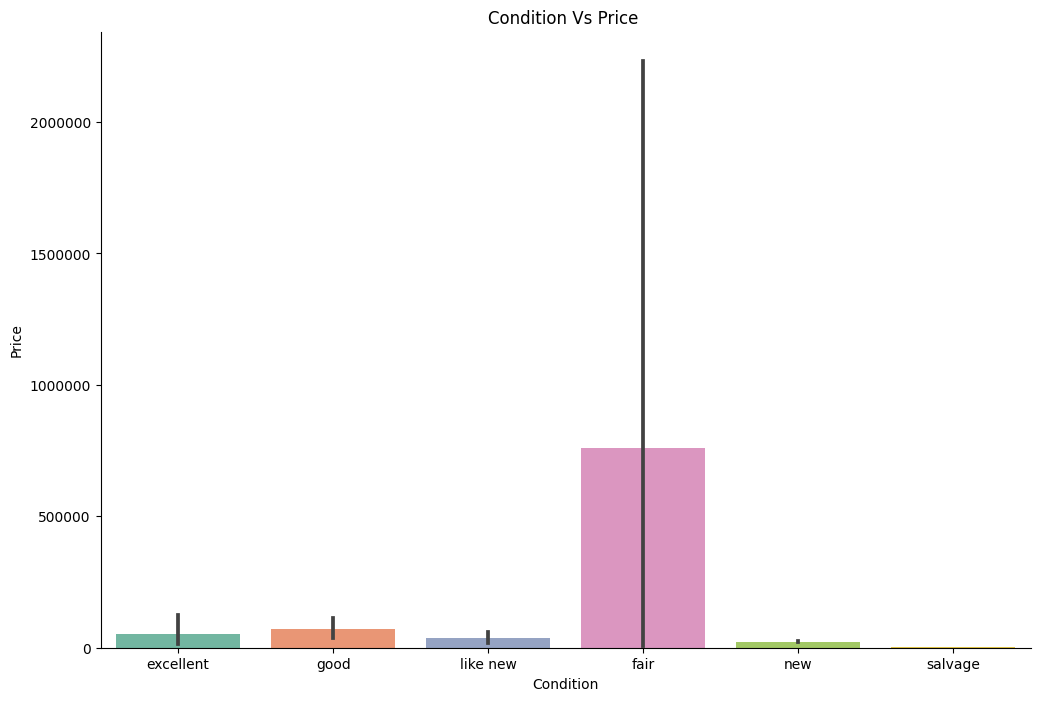

In [14]:
# Plot the bar graph of condition without scientific notation
plt.figure(figsize=(12, 8))
sns.set_palette('Set2')
sns.barplot(x=df['condition'], y=df['price'])

# Title and labels
plt.title('Condition Vs Price ')
plt.xlabel('Condition')
plt.ylabel('Price')

# Remove spines
sns.despine()

# Prevent scientific notation on the y-axis
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()

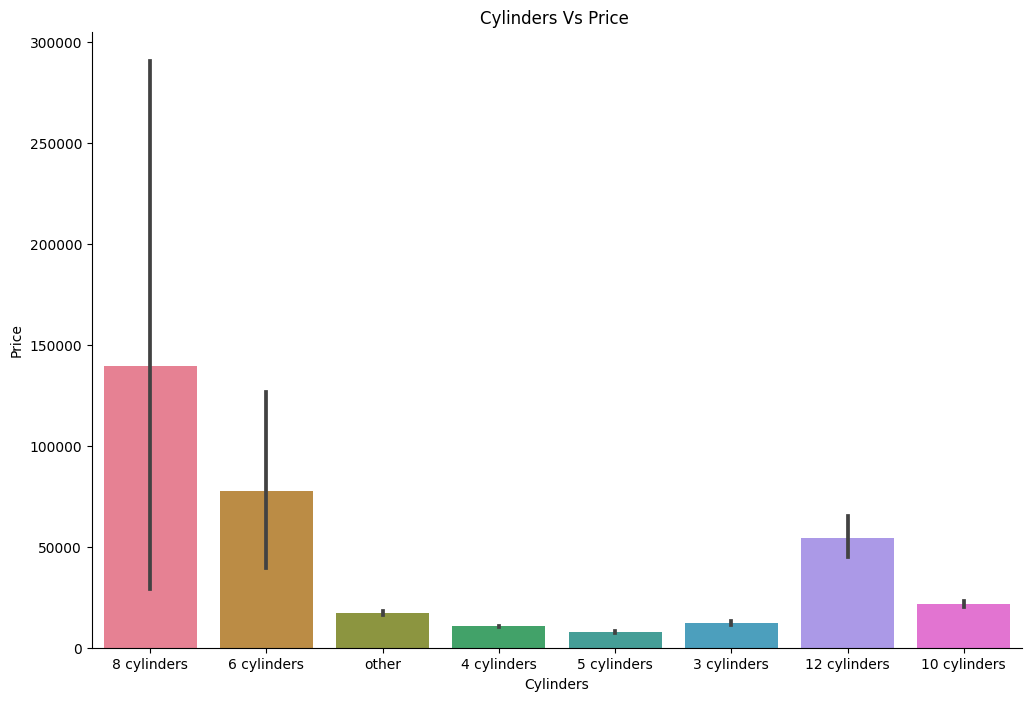

In [15]:
#Plot cylinders vs price
plt.figure(figsize=(12,8))
sns.set_palette("husl", 8)
sns.barplot(x=df['cylinders'],y=df['price'])
plt.title('Cylinders Vs Price ')
plt.xlabel('Cylinders')
plt.ylabel('Price')
sns.despine()
plt.show()

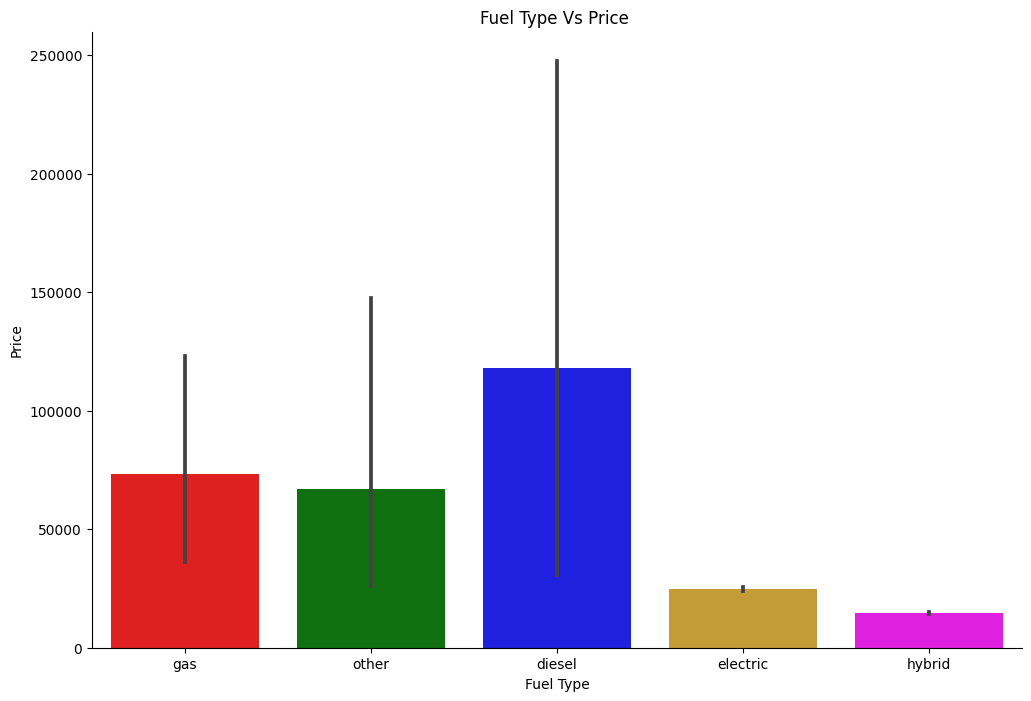

In [16]:
#Plot fuel type and price
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='fuel',y='price',palette=["red", "green", "blue", "goldenrod", "magenta"])
plt.title('Fuel Type Vs Price ')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
sns.despine()
plt.show()

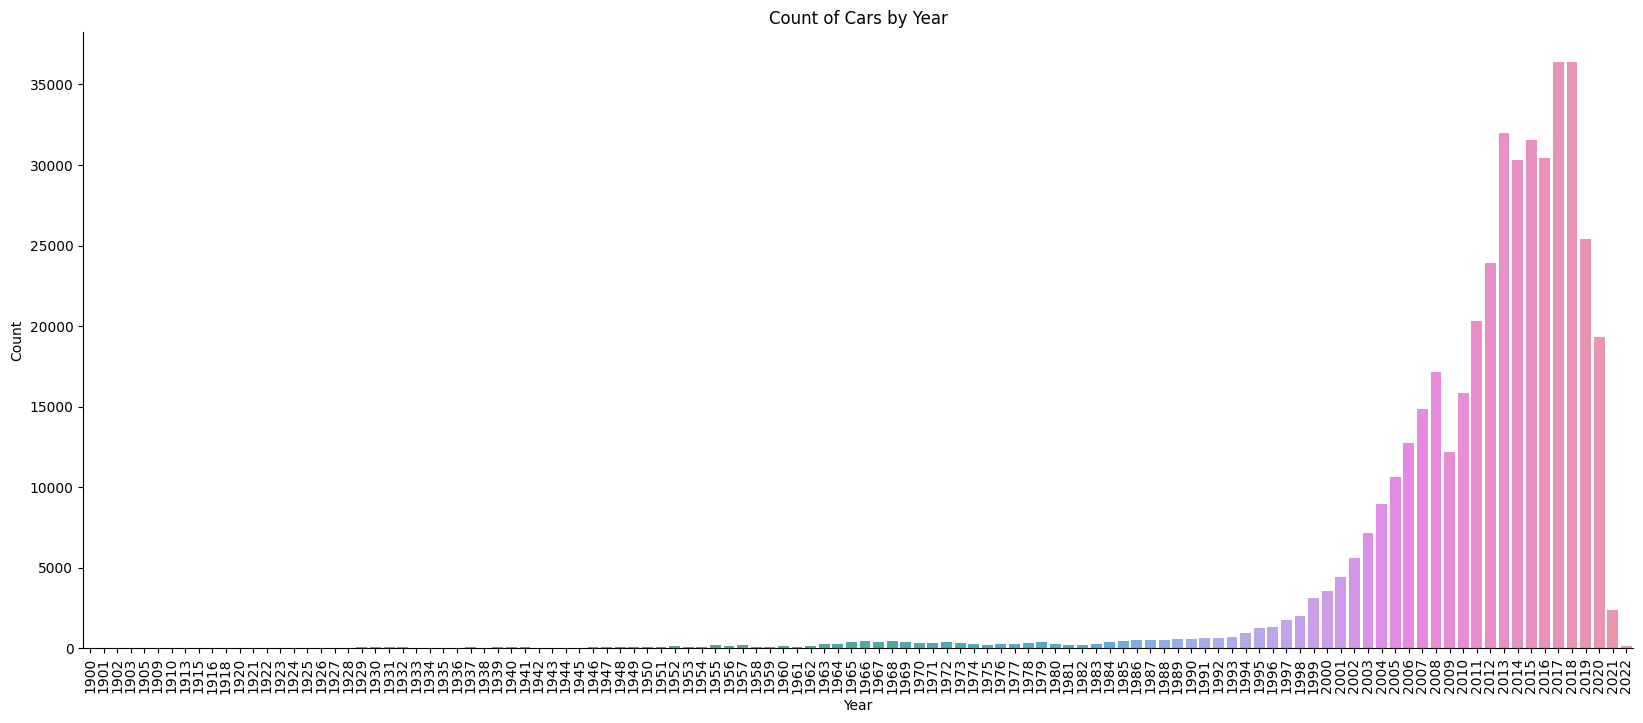

In [17]:
#Count of vehicles per year
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
df_year=pd.DataFrame(df['year'].astype(int))
ax = sns.countplot(x="year", data=df_year)
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
sns.despine()
plt.show()

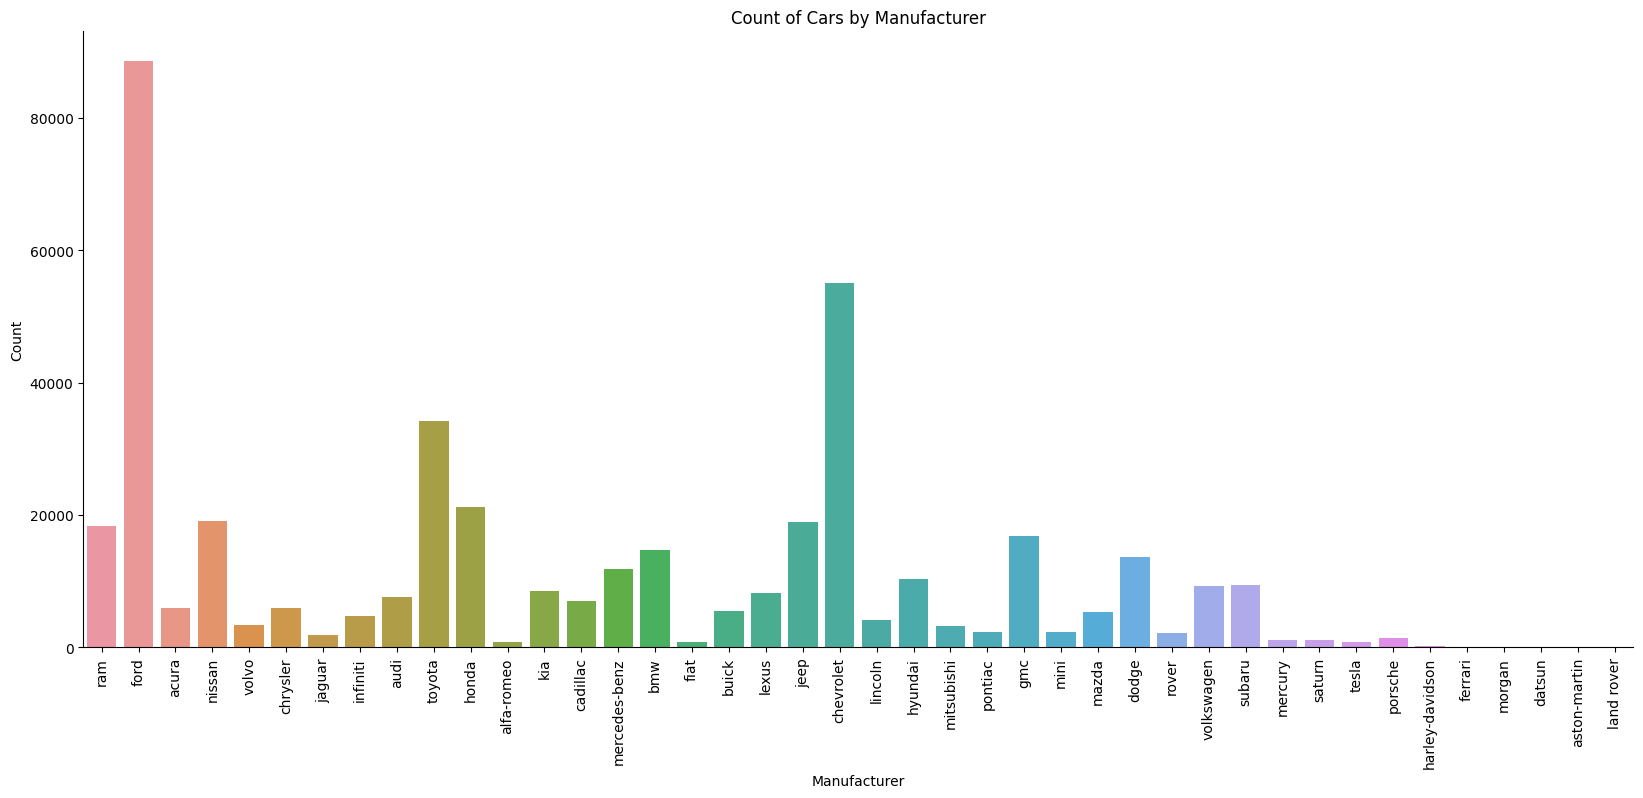

In [18]:
#Cars by manufacturer
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.countplot(x="manufacturer", data=df)
plt.title('Count of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
sns.despine()
plt.show()

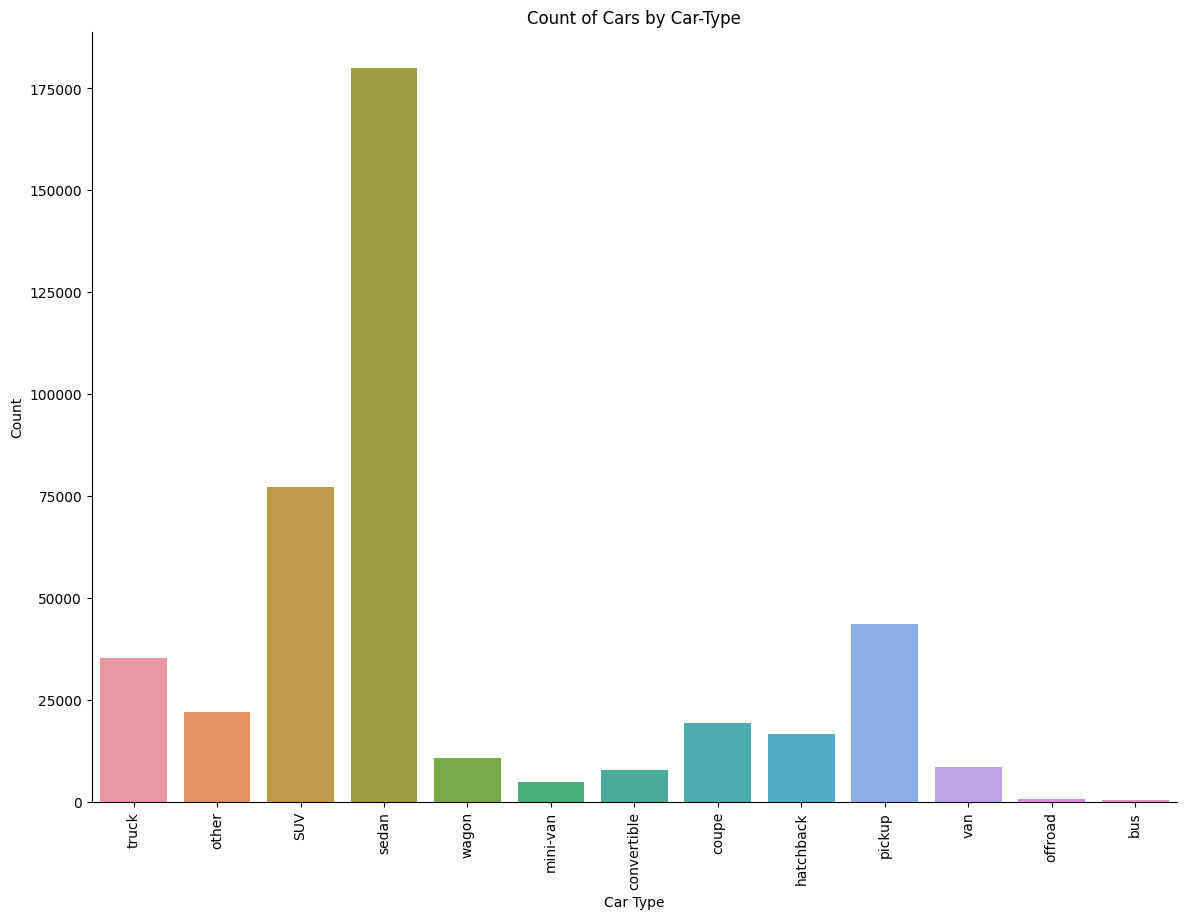

In [19]:
#Count of cars by car type
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
ax = sns.countplot(x="type", data=df)
plt.title('Count of Cars by Car-Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
sns.despine()
plt.show()

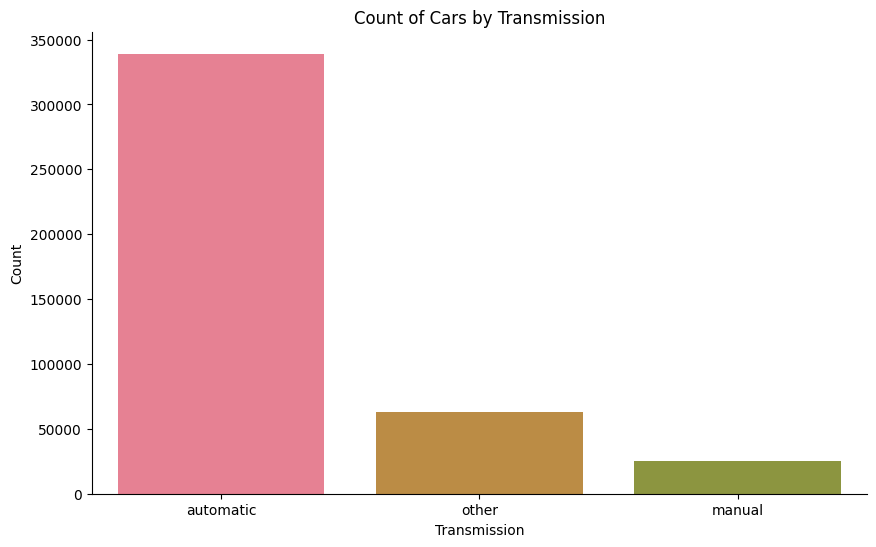

In [20]:
#Count of cars by transmission
plt.figure(figsize=(10,6))
#plt.xticks(rotation=90)
ax = sns.countplot(x="transmission", data=df)
plt.title('Count of Cars by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
sns.despine()
plt.show()

In [21]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'removal_date'],
      dtype='object')

In [22]:
# Dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long']
df = df.drop(columns=columns_to_drop)

## Time Series Analysis

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

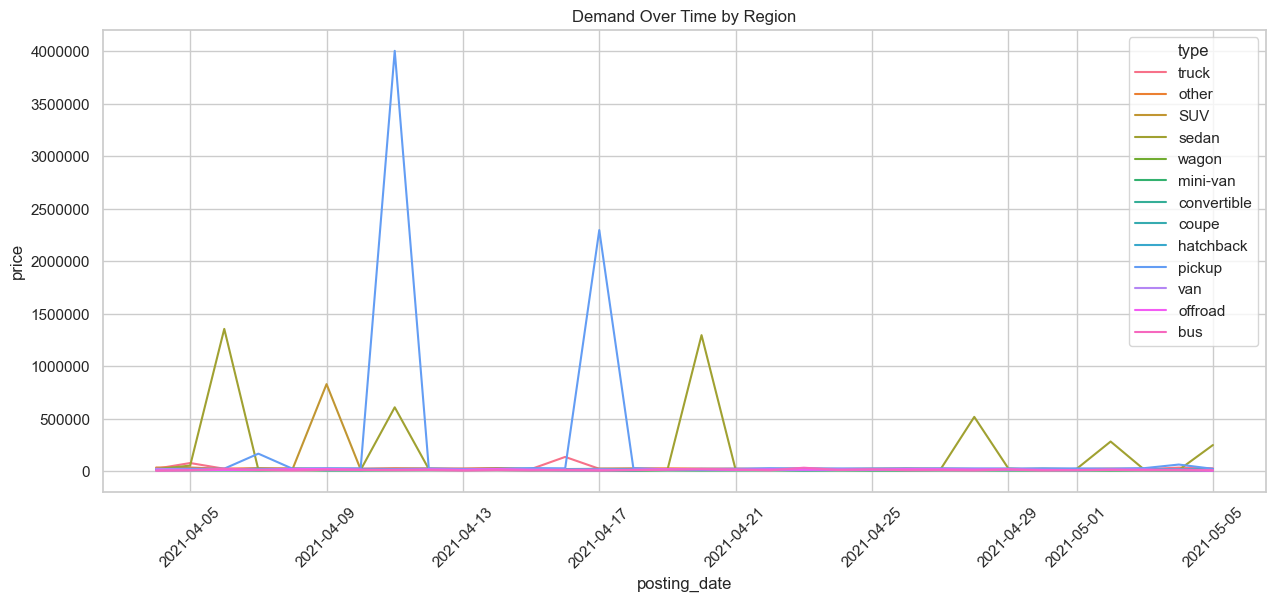

In [48]:
#Price over the years
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='posting_date', y='price', hue='type', ci=None)
plt.title('Demand Over Time by Region')
plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

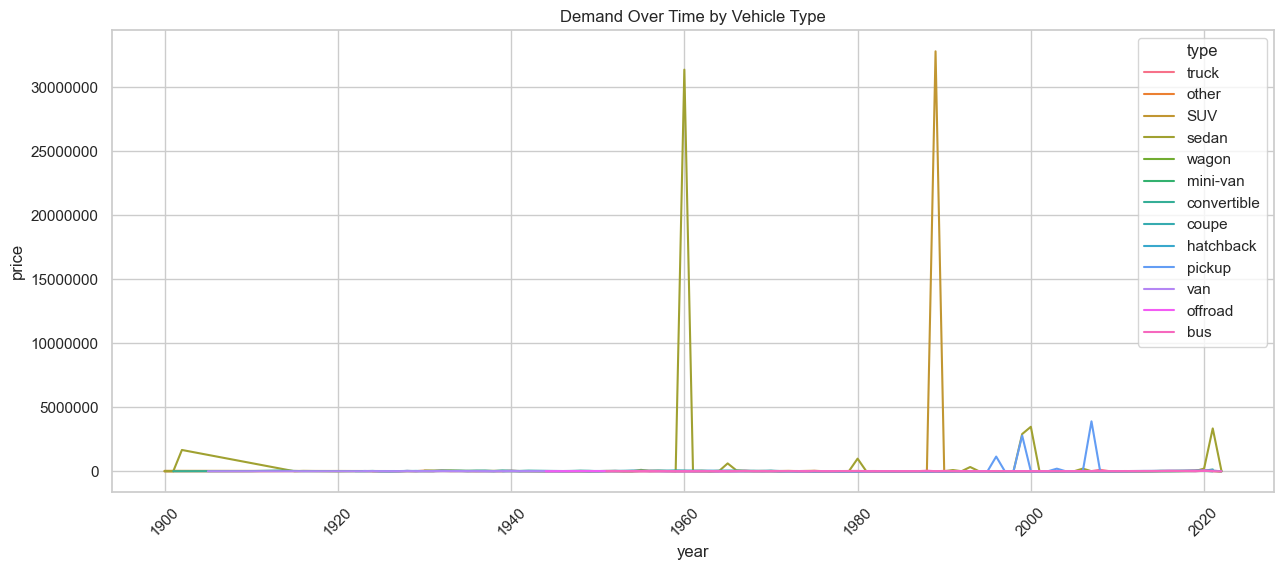

In [47]:
#Price over the years
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='year', y='price', hue='type', ci=None)
plt.title('Demand Over Time by Vehicle Type')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
plt.show()

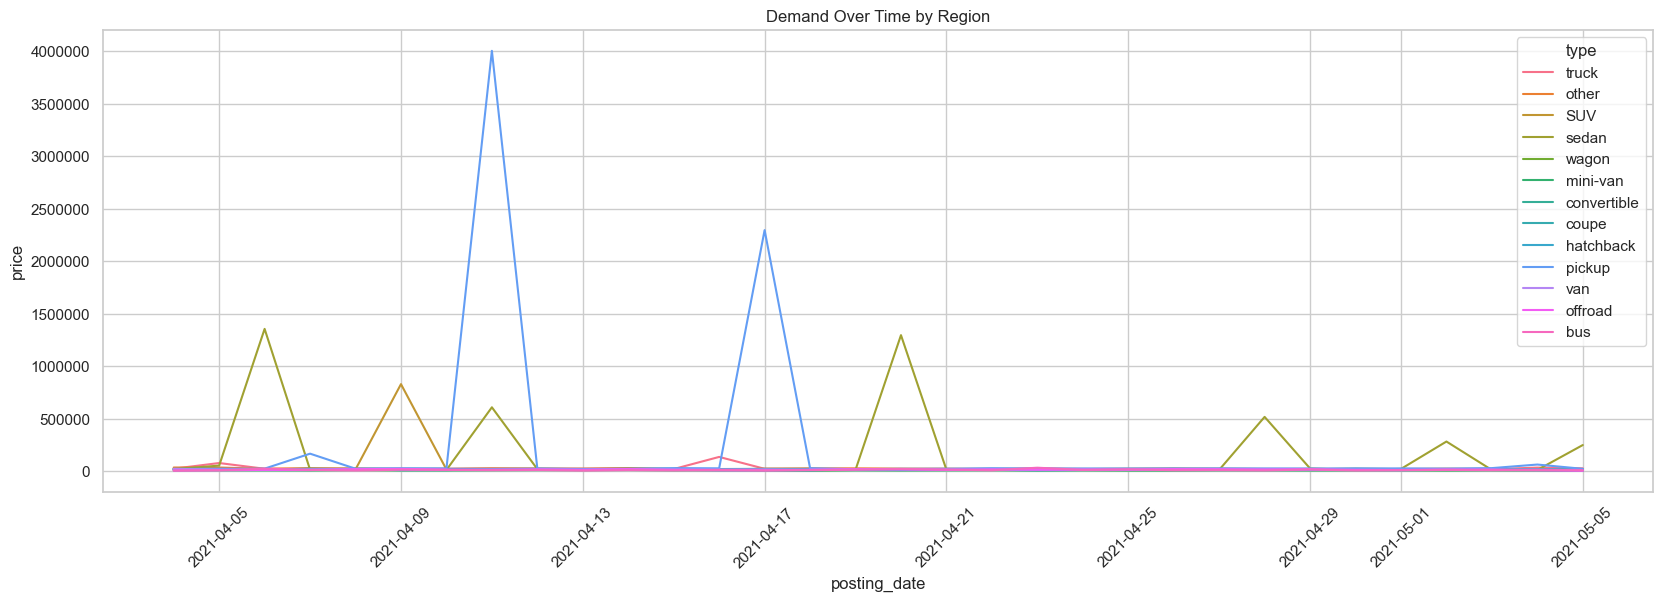

In [45]:
#Price over the years
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='posting_date', y='price', hue='type', ci=None)
plt.title('Demand Over Time by Region')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
plt.show()

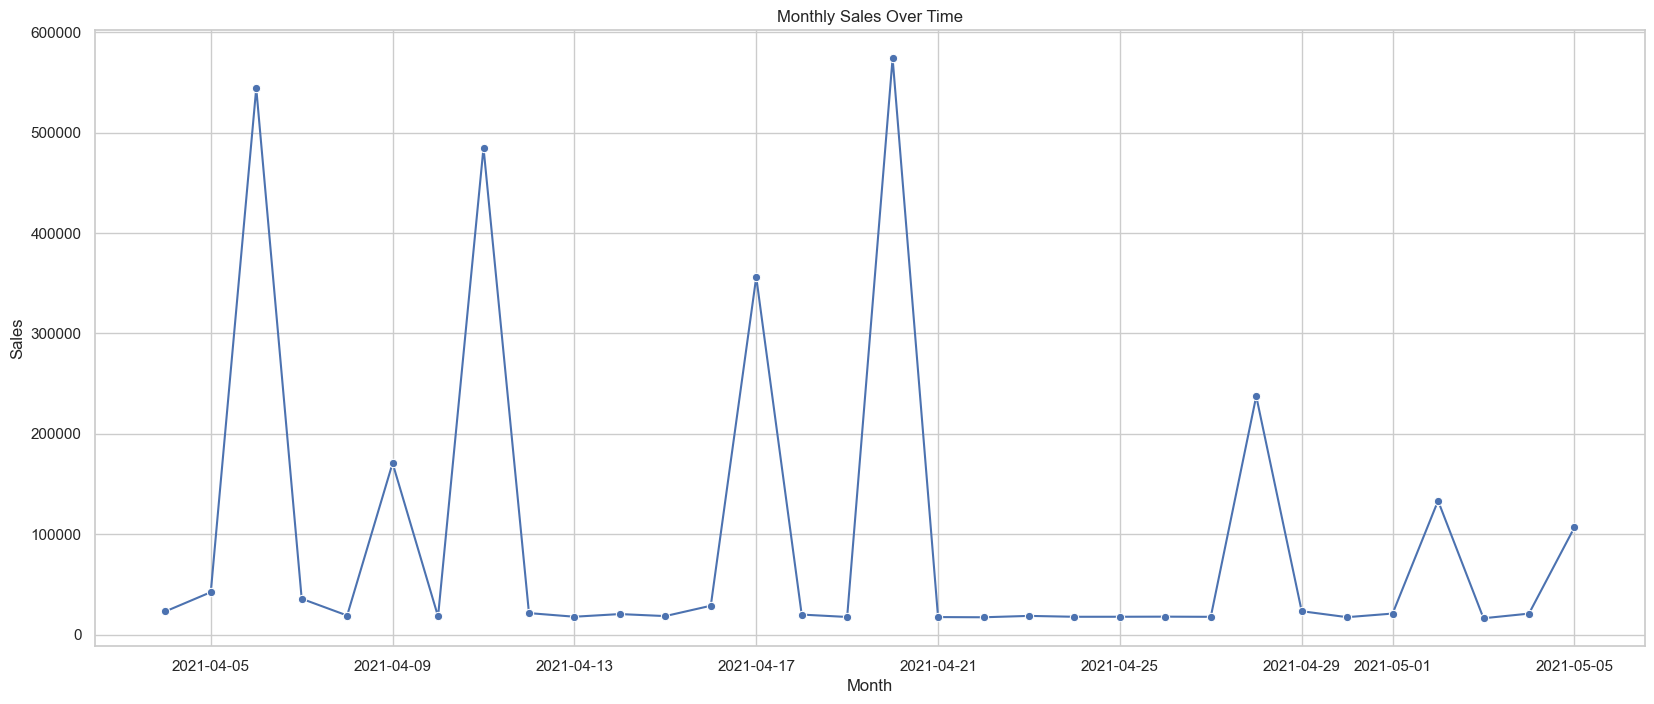

In [46]:
# Set the seaborn style if you prefer
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(20, 8))

# Use Seaborn's lineplot function to create the line graph
sns.lineplot(x=df.index, y=df['price'], marker='o', linestyle='-', ci=None)

plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.show()

### Calculate some statistical measures

In [28]:
# Calculate the mean and standard deviation
mean_price = round(df['price'].mean())
std_price = round(df['price'].std())

print("Mean Price:", mean_price)
print("Standard Deviation of price:", std_price)

Mean Price: 75199
Standard Deviation of price: 12182282


### Time Series Decomposition

In [29]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df['price'], model='additive',period=12)

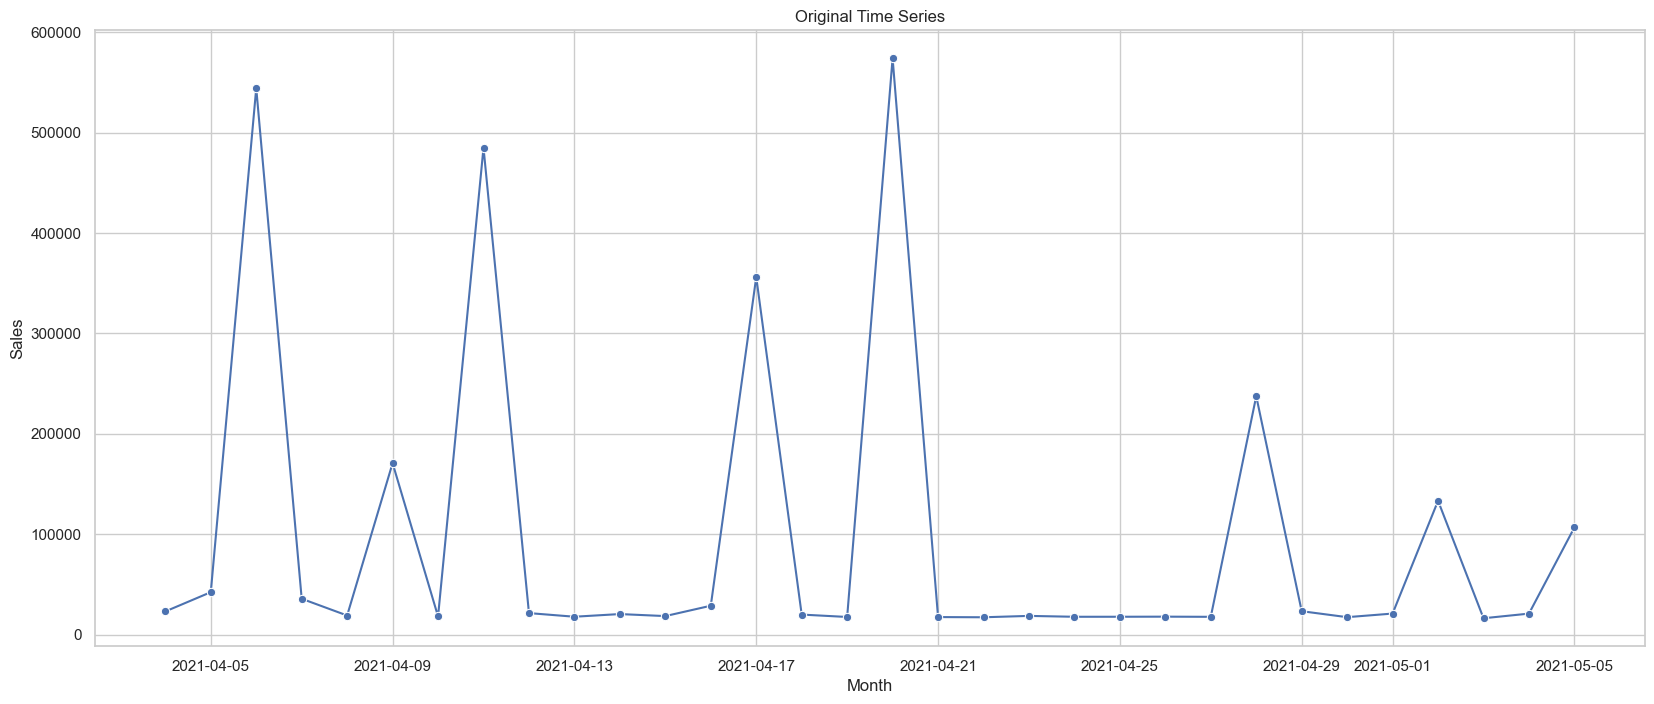

In [30]:
# Plot the original time series, trend, seasonality, and residuals
plt.figure(figsize=(20, 8))

# Use Seaborn's lineplot function to create the line graph
sns.lineplot(x=df.index, y=df['price'], marker='o', linestyle='-', ci=None)

plt.title('Original Time Series')
plt.xlabel('Month')
plt.ylabel('Sales')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.show()

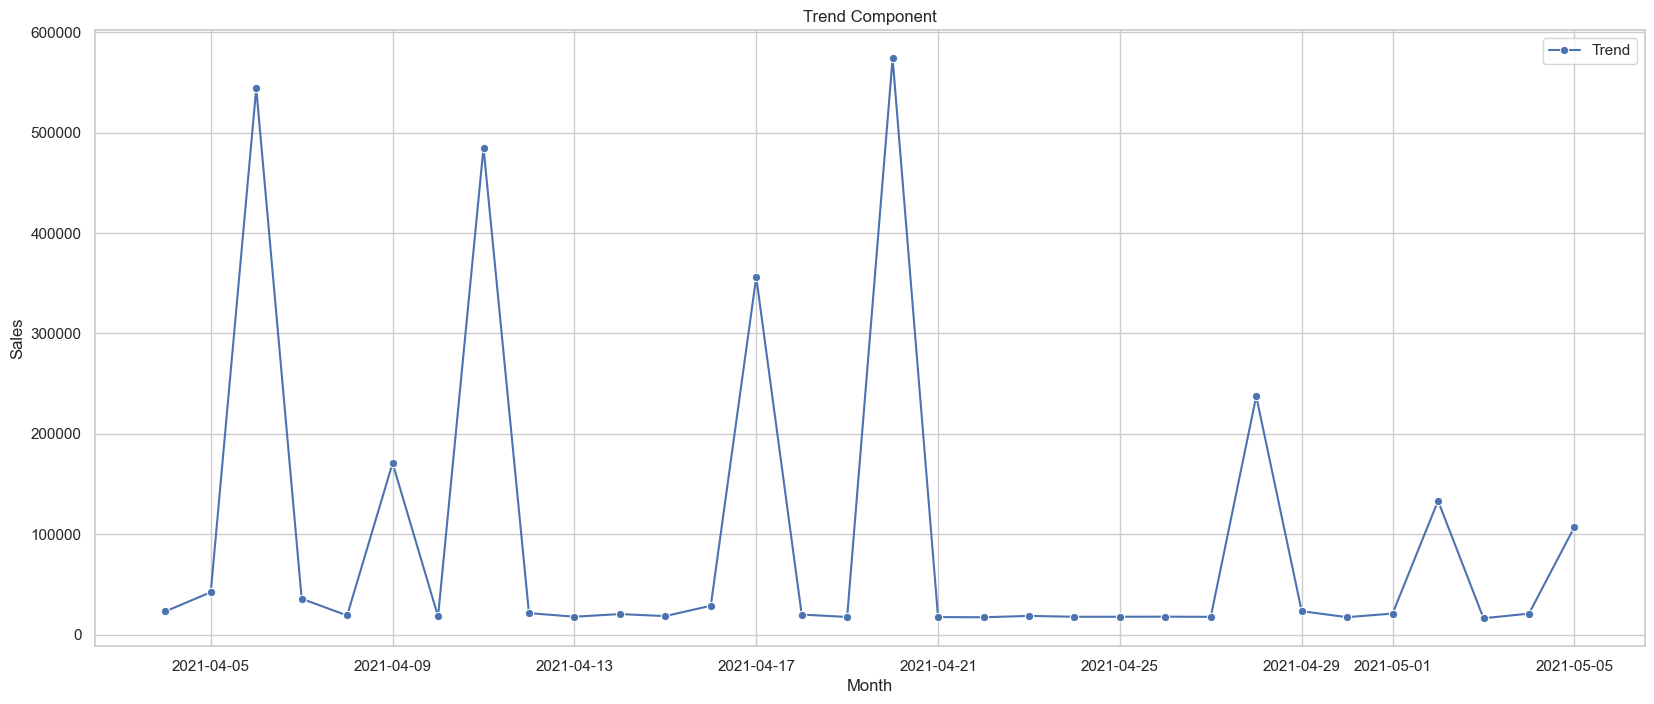

In [31]:
# Plot the original time series, trend, seasonality, and residuals
plt.figure(figsize=(20, 8))

sns.lineplot(decomposition.trend, label='Trend', color='b', marker='o', linestyle='-', ci=None)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Trend Component')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


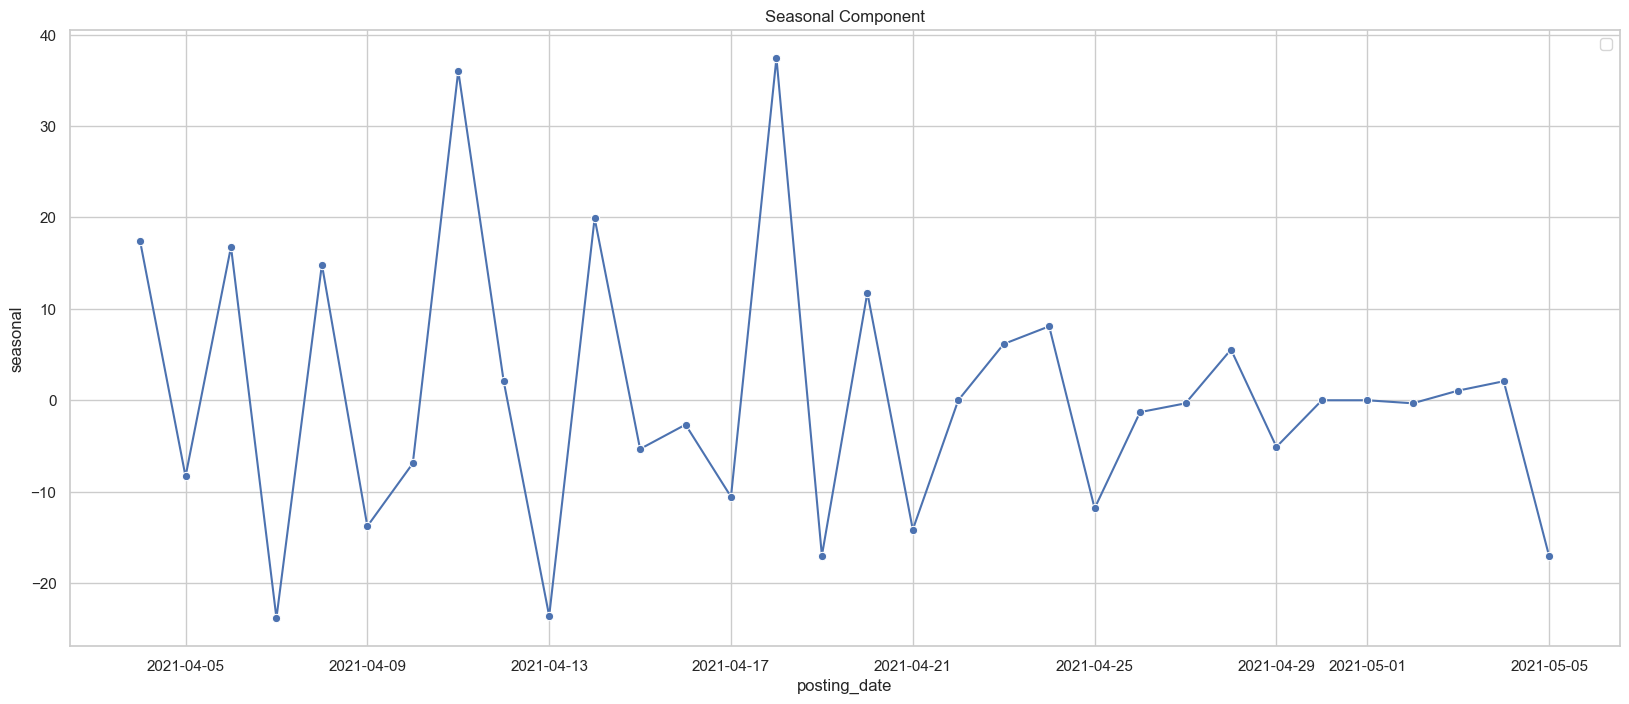

In [32]:
plt.figure(figsize=(20, 8))

sns.lineplot(decomposition.seasonal, color='b', marker='o', linestyle='-', ci=None)
plt.legend()
plt.title('Seasonal Component')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


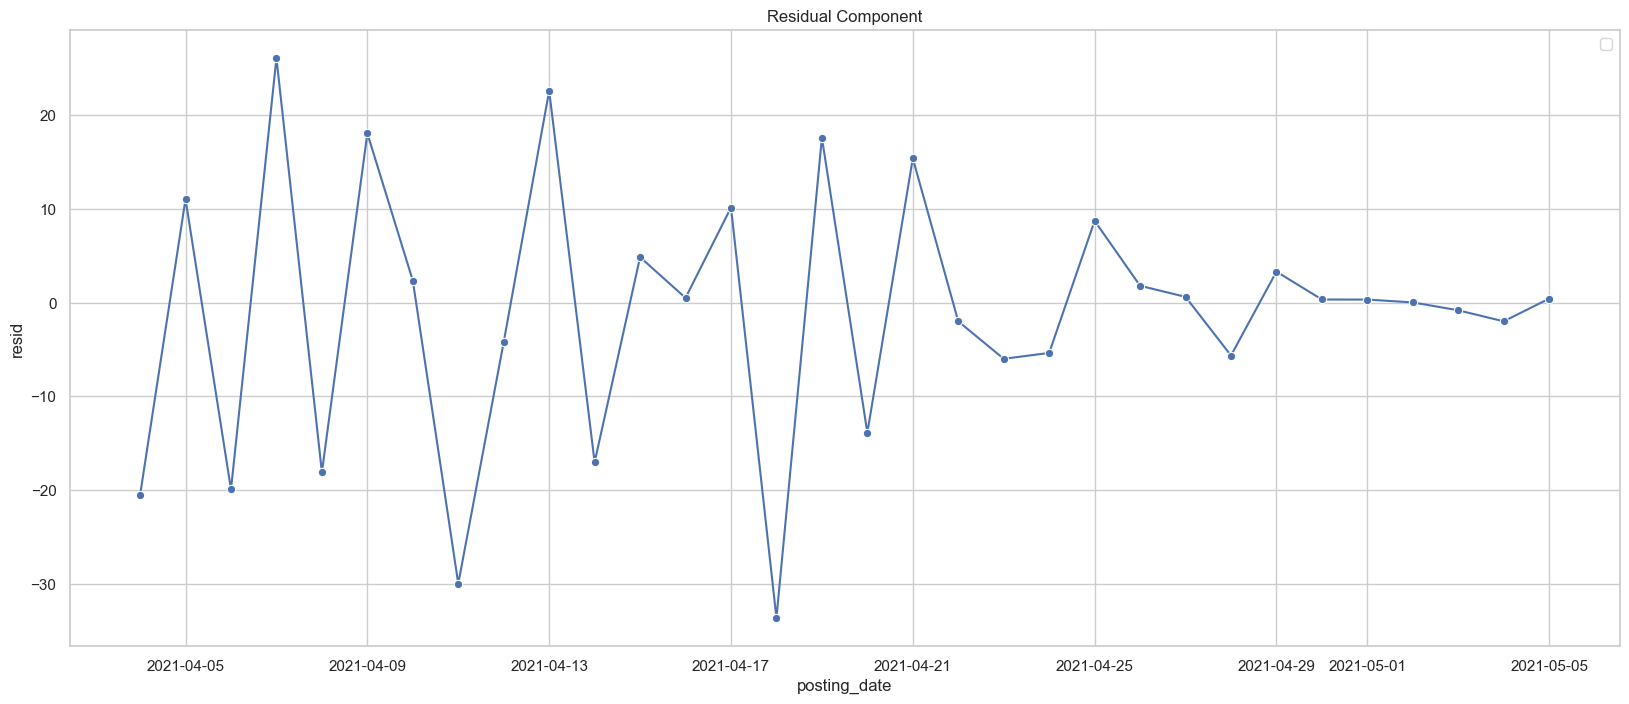

In [33]:
plt.figure(figsize=(20, 8))

sns.lineplot(decomposition.resid, color='b', marker='o', linestyle='-', ci=None)
plt.legend()
plt.title('Residual Component')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

## ARIMA Time Series Model

In [34]:
p = 1 # p: AutoRegressive (AR) order
d = 1 # d: Integrated (I) order (order of differencing)
q = 1 # q: Moving Average (MA) order

# Fit an ARIMA model to the data
model = sm.tsa.ARIMA(df['price'], order=(p, d, q))

results = model.fit()


# Print the model summary
print(results.summary())

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:               426880
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -7575408.123
Date:                Thu, 02 Nov 2023   AIC                       15150822.247
Time:                        12:45:23   BIC                       15150855.140
Sample:                             0   HQIC                      15150831.620
                             - 426880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -6.438e-05      0.152     -0.000      1.000      -0.297       0.297
ma.L1         -0.9999   3.74e-05  -2.68e+04      0.000      -1.000      -1.000
sigma2      1.855e+14   2.17e-12   8.56e+25      0.0

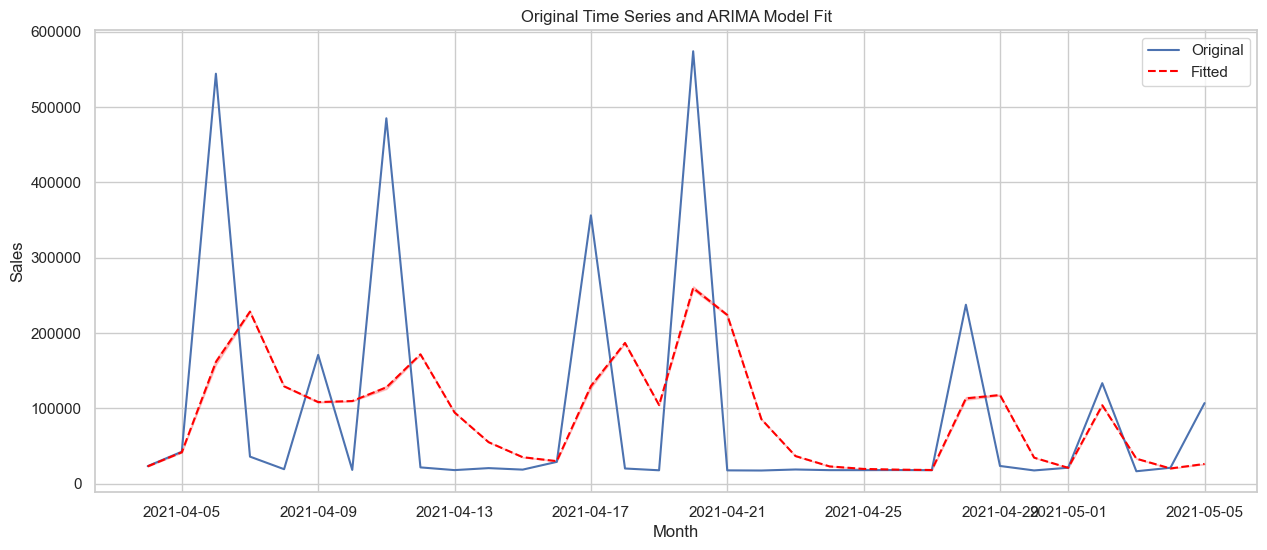

In [36]:
# Set the seaborn style if you prefer
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(15, 6))

# Plot the original time series
sns.lineplot(x=df.index, y=df['price'], label='Original', ci=None)

# Plot the ARIMA model's predictions
sns.lineplot(x=df.index, y=results.fittedvalues, color='red', label='Fitted', linestyle='--')

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.legend()
plt.title('Original Time Series and ARIMA Model Fit')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

plt.show()